In [1]:
# Import the dependicies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from datetime import datetime

# Import the API key
from config import weather_api_key

In [2]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + weather_api_key


In [3]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(-90, 90, size = 1500)
lngs = np.random.uniform(-180, 180, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities
cities = []
# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
len(cities)

611

In [6]:
# Create an empty list to hold the weather data
city_data = []
# Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count
    record_count += 1
    
# Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 2 of Set 1 | inta
Processing Record 3 of Set 1 | songjianghe
Processing Record 4 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | flin flon
Processing Record 7 of Set 1 | hilo
Processing Record 8 of Set 1 | sabha
Processing Record 9 of Set 1 | torbay
Processing Record 10 of Set 1 | weinan
Processing Record 11 of Set 1 | sumbe
Processing Record 12 of Set 1 | college
Processing Record 13 of Set 1 | atuona
Processing Record 14 of Set 1 | butaritari
Processing Record 15 of Set 1 | saint pete beach
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | majene
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 20 of Set 1 | mataura
Processing Record 21 of Set 1 | bambous virieux
Pro

Processing Record 37 of Set 4 | ludvika
Processing Record 38 of Set 4 | yefremov
Processing Record 39 of Set 4 | kieta
Processing Record 40 of Set 4 | monte patria
Processing Record 41 of Set 4 | esperance
Processing Record 42 of Set 4 | lompoc
Processing Record 43 of Set 4 | broken hill
Processing Record 44 of Set 4 | kalispell
Processing Record 45 of Set 4 | haysville
Processing Record 46 of Set 4 | provideniya
Processing Record 47 of Set 4 | jos
Processing Record 48 of Set 4 | yining
Processing Record 49 of Set 4 | isangel
Processing Record 50 of Set 4 | pimentel
Processing Record 1 of Set 5 | burkhala
City not found. Skipping...
Processing Record 2 of Set 5 | kiama
Processing Record 3 of Set 5 | komsomolskiy
Processing Record 4 of Set 5 | talnakh
Processing Record 5 of Set 5 | sitka
Processing Record 6 of Set 5 | alto araguaia
Processing Record 7 of Set 5 | cherskiy
Processing Record 8 of Set 5 | katsuura
Processing Record 9 of Set 5 | urdoma
Processing Record 10 of Set 5 | ternate

Processing Record 26 of Set 8 | pleasanton
Processing Record 27 of Set 8 | sarangani
Processing Record 28 of Set 8 | san francisco
Processing Record 29 of Set 8 | fereydun kenar
Processing Record 30 of Set 8 | mahadday weyne
City not found. Skipping...
Processing Record 31 of Set 8 | impfondo
Processing Record 32 of Set 8 | lebu
Processing Record 33 of Set 8 | wajir
Processing Record 34 of Set 8 | elko
Processing Record 35 of Set 8 | hambantota
Processing Record 36 of Set 8 | beberibe
Processing Record 37 of Set 8 | ahar
Processing Record 38 of Set 8 | yeniseysk
Processing Record 39 of Set 8 | halalo
City not found. Skipping...
Processing Record 40 of Set 8 | camargo
Processing Record 41 of Set 8 | villazon
Processing Record 42 of Set 8 | pudozh
Processing Record 43 of Set 8 | sinkat
City not found. Skipping...
Processing Record 44 of Set 8 | abaza
Processing Record 45 of Set 8 | namibe
Processing Record 46 of Set 8 | aklavik
Processing Record 47 of Set 8 | gasa
Processing Record 48 of

Processing Record 12 of Set 12 | baley
Processing Record 13 of Set 12 | burnie
Processing Record 14 of Set 12 | nea efesos
Processing Record 15 of Set 12 | odienne
Processing Record 16 of Set 12 | nalut
Processing Record 17 of Set 12 | petropavlovsk-kamchatskiy
Processing Record 18 of Set 12 | harper
Processing Record 19 of Set 12 | goba
Processing Record 20 of Set 12 | kamenskoye
City not found. Skipping...
Processing Record 21 of Set 12 | poum
Processing Record 22 of Set 12 | dien bien
City not found. Skipping...
Processing Record 23 of Set 12 | vredendal
Processing Record 24 of Set 12 | bingol
Processing Record 25 of Set 12 | erenhot
Processing Record 26 of Set 12 | road town
Processing Record 27 of Set 12 | tianpeng
Processing Record 28 of Set 12 | talgar
Processing Record 29 of Set 12 | caravelas
Processing Record 30 of Set 12 | parrita
Processing Record 31 of Set 12 | salvador
Processing Record 32 of Set 12 | wanxian
Processing Record 33 of Set 12 | ferkessedougou
Processing Reco

In [7]:
len(city_data)

551

In [8]:
# Convert the array of dictionaries to a Pandas dataframe
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Inta,66.0317,60.1659,21.65,95,49,13.47,RU,2021-10-24 04:42:16
1,Songjianghe,42.1859,127.4790,51.21,36,0,4.94,CN,2021-10-24 04:42:17
2,Albany,42.6001,-73.9662,46.80,81,54,1.99,US,2021-10-24 04:37:56
3,Flin Flon,54.7682,-101.8650,37.90,71,98,10.22,CA,2021-10-24 04:33:47
4,Hilo,19.7297,-155.0900,76.73,79,40,3.44,US,2021-10-24 04:42:17
5,Sabha,27.0377,14.4283,73.31,25,41,13.89,LY,2021-10-24 04:42:18
6,Torbay,47.6666,-52.7314,58.75,97,90,11.50,CA,2021-10-24 04:42:18
7,Weinan,34.5036,109.5089,62.29,57,12,3.22,CN,2021-10-24 04:42:18
8,Sumbe,-11.2061,13.8437,74.75,79,99,1.54,AO,2021-10-24 04:42:19
9,College,64.8569,-147.8028,33.91,85,40,3.44,US,2021-10-24 04:38:22


In [11]:
# Reorder columns alphabetically
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Inta,RU,2021-10-24 04:42:16,66.0317,60.1659,21.65,95,49,13.47
1,Songjianghe,CN,2021-10-24 04:42:17,42.1859,127.4790,51.21,36,0,4.94
2,Albany,US,2021-10-24 04:37:56,42.6001,-73.9662,46.80,81,54,1.99
3,Flin Flon,CA,2021-10-24 04:33:47,54.7682,-101.8650,37.90,71,98,10.22
4,Hilo,US,2021-10-24 04:42:17,19.7297,-155.0900,76.73,79,40,3.44
5,Sabha,LY,2021-10-24 04:42:18,27.0377,14.4283,73.31,25,41,13.89
6,Torbay,CA,2021-10-24 04:42:18,47.6666,-52.7314,58.75,97,90,11.50
7,Weinan,CN,2021-10-24 04:42:18,34.5036,109.5089,62.29,57,12,3.22
8,Sumbe,AO,2021-10-24 04:42:19,-11.2061,13.8437,74.75,79,99,1.54
9,College,US,2021-10-24 04:38:22,64.8569,-147.8028,33.91,85,40,3.44


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

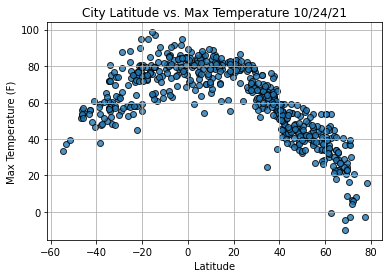

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

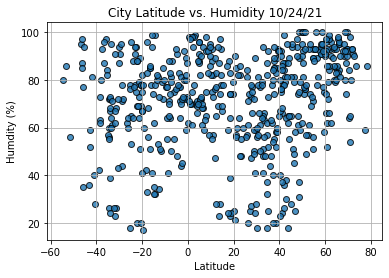

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humdity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

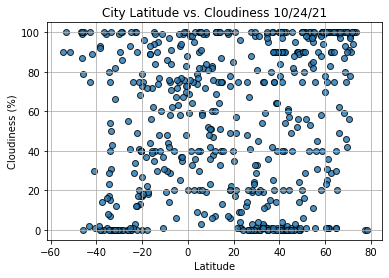

In [22]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

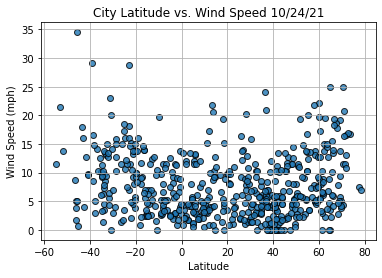

In [23]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [113]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    

In [114]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Inta,RU,2021-10-24 04:42:16,66.0317,60.1659,21.65,95,49,13.47
1,Songjianghe,CN,2021-10-24 04:42:17,42.1859,127.4790,51.21,36,0,4.94
2,Albany,US,2021-10-24 04:37:56,42.6001,-73.9662,46.80,81,54,1.99
3,Flin Flon,CA,2021-10-24 04:33:47,54.7682,-101.8650,37.90,71,98,10.22
4,Hilo,US,2021-10-24 04:42:17,19.7297,-155.0900,76.73,79,40,3.44


In [115]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

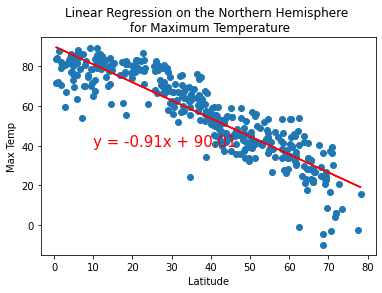

In [116]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \n for Maximum Temperature", 
                       "Max Temp",
                       (10,40))


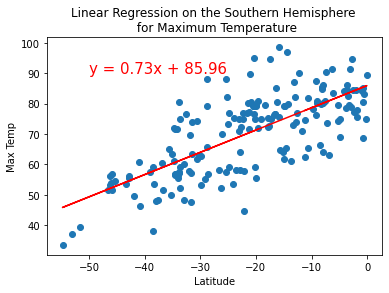

In [117]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \n for Maximum Temperature", 
                       "Max Temp",
                       (-50,90))


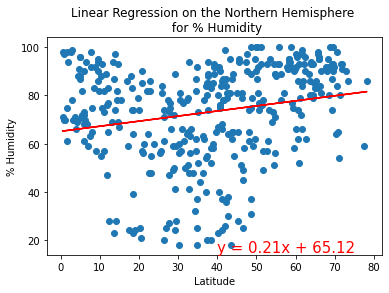

In [128]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \n for % Humidity", 
                       "% Humidity",
                       (40,15))


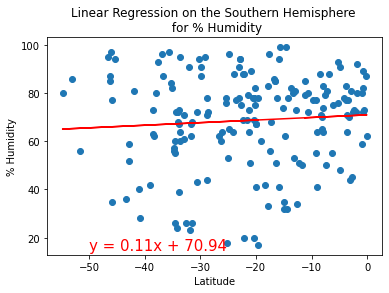

In [121]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \n for % Humidity", 
                       "% Humidity",
                       (-50,15))

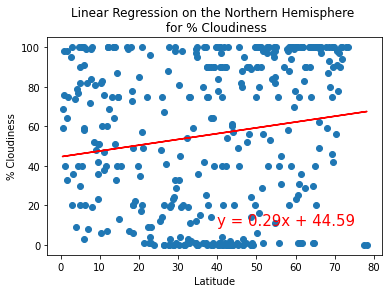

In [124]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \n for % Cloudiness", 
                       "% Cloudiness",
                       (40,10))


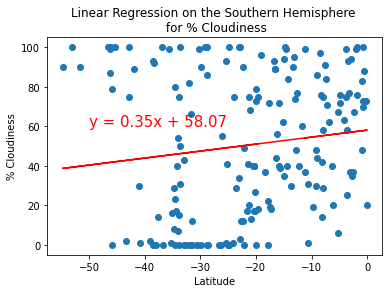

In [125]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \n for % Cloudiness", 
                       "% Cloudiness",
                       (-50,60))


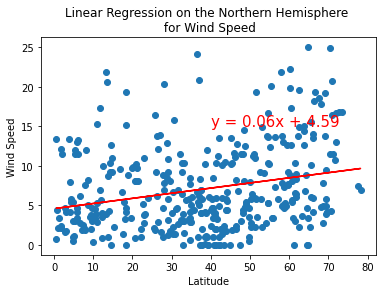

In [127]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \n for Wind Speed",
                       "Wind Speed",
                       (40,15))

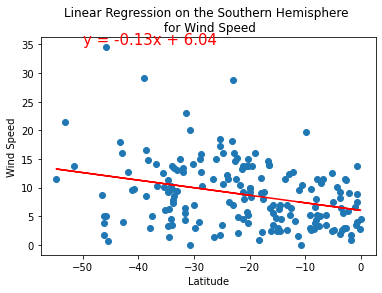

In [129]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \n for Wind Speed", 
                       "Wind Speed",
                       (-50,35))
